In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.cloud import bigquery
from google.colab import auth

project_id = 'fellowship-413106'
dataset_id = 'njerii'
table_id = 'mlops'

client = bigquery.Client(project=project_id, location='EU')

class Auth:
    def authenticate_user(self):
        auth.authenticate_user()
        print('Authenticated')
auth.authenticate_user()

query = """
SELECT
*
FROM
  `fellowship-413106.njerii.mental_behavioral_disorders`
 """ ;


job = client.query(query)

df = job.result().to_dataframe()


In [27]:
df.head(3)

,diagnosis_created,service_type,msp,payer_code,code,diagnosis_name,encounter_id,gender,claim_id,msp_code,...,claim_amount,copay_amount,discount_amount,name,chapter_code,block_name,cat_name,diag_name,diagnosis_level,age
0,2023-01-10 00:23:45.134947+00:00,OUTPATIENT,Avenue Healthcare Ltd,2001,F20,Schizophrenia,5447986.0,FEMALE,7068944,4190,...,NaN,NaN,NaN,Schizophrenia,Mental and behavioural disorders,"Schizophrenia, schizotypal and delusional diso...",Schizophrenia,NULL,secondary,55
1,2023-01-04 00:19:25.846574+00:00,OUTPATIENT,Avenue Healthcare Ltd,2001,F20,Schizophrenia,5424946.0,FEMALE,7046261,4190,...,NaN,NaN,NaN,Schizophrenia,Mental and behavioural disorders,"Schizophrenia, schizotypal and delusional diso...",Schizophrenia,NULL,primary,55
2,2023-08-22 16:34:56.454148+00:00,OUTPATIENT,AAR Healthcare Kenya Ltd,2001,F50.0,Anorexia nervosa,6468181.0,MALE,8290403,3652,...,NaN,NaN,NaN,Behavioural syndromes associated with physiolo...,Mental and behavioural disorders,Behavioural syndromes associated with physiolo...,Eating disorders,Behavioural syndromes associated with physiolo...,primary,21


In [28]:
df.columns

Index(['diagnosis_created', 'service_type', 'msp', 'payer_code', 'code',
       'diagnosis_name', 'encounter_id', 'gender', 'claim_id', 'msp_code',
       'location', 'claim_amount', 'copay_amount', 'discount_amount', 'name',
       'chapter_code', 'block_name', 'cat_name', 'diag_name',
       'diagnosis_level', 'age'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18465 entries, 0 to 18464
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   diagnosis_created  18465 non-null  datetime64[us, UTC]
 1   service_type       18465 non-null  object             
 2   msp                18465 non-null  object             
 3   payer_code         18465 non-null  Int64              
 4   code               18465 non-null  object             
 5   diagnosis_name     18465 non-null  object             
 6   encounter_id       18465 non-null  float64            
 7   gender             18465 non-null  object             
 8   claim_id           18465 non-null  Int64              
 9   msp_code           18465 non-null  Int64              
 10  location           18465 non-null  object             
 11  claim_amount       7356 non-null   float64            
 12  copay_amount       7356 non-null   float64    

In [30]:
def convert_to_string(df, column_name):
    df[column_name] = df[column_name].astype('string')
    print(f'column, {column_name}, converted to string')
    return df

In [31]:
convert_to_string(df, 'msp_code')
convert_to_string(df, 'payer_code')
convert_to_string(df, 'encounter_id')

df.dtypes


column, msp_code, converted to string
column, payer_code, converted to string
column, encounter_id, converted to string


,0
diagnosis_created,"datetime64[us, UTC]"
service_type,object
msp,object
payer_code,string[python]
code,object
diagnosis_name,object
encounter_id,string[python]
gender,object
claim_id,Int64
msp_code,string[python]


In [32]:
df.shape

(18465, 21)

In [33]:
df.isnull().sum()

,0
diagnosis_created,0
service_type,0
msp,0
payer_code,0
code,0
diagnosis_name,0
encounter_id,0
gender,0
claim_id,0
msp_code,0


In [34]:
df['age'].skew()

0.14223762904852394

The age column is slightly skewed to the right. Mean would be appropriate to impute null

In [35]:
max_age= df['age'].max()
min_age= df['age'].min()
mean_age= round(df['age'].mean(),0)
median_age = df['age'].median()
print(f'Maximum age is , {max_age}')
print(f'Minimum age is , {min_age}')
print(f'Mean age is , {mean_age}')
print(f'Median age is , {median_age}')

Maximum age is , 88
Minimum age is , 0
Mean age is , 31.0
Median age is , 32.0


In [36]:
df['age'] = df['age'].fillna(mean_age)

<Axes: xlabel='age', ylabel='Density'>

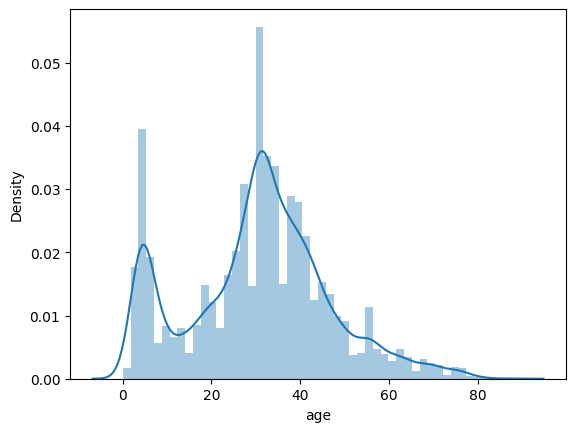

In [37]:
# Checking on the Age distribution
import seaborn as sb
sb.distplot(df['age'])

Checking the distribution of the column 'Age'

In [38]:
df['claim_amount'].skew()

16.8440718324342

Claim amount is heavily skewed to the right. It would be appropriate to impute the missing values with median



In [39]:
median_claim_amt= df['claim_amount'].median()

df['claim_amount'] = df['age'].fillna(median_claim_amt)

In [46]:
df = df.drop(['payer_code','copay_amount', 'discount_amount','name','location', 'diagnosis_created', 'msp', 'encounter_id', 'claim_id','msp_code','cat_name'], axis=1)

KeyError: "['copay_amount', 'discount_amount', 'name', 'location', 'diagnosis_created', 'msp', 'encounter_id', 'claim_id', 'msp_code'] not found in axis"

In [47]:
df.isnull().sum()

,0
service_type,0
payer_code,0
code,0
diagnosis_name,0
gender,0
claim_amount,0
chapter_code,0
block_name,0
cat_name,0
diag_name,0


In [53]:




print("Numerical Columns:", numerical_cols)
print("\nCategorical Columns:", categorical_cols)

Numerical Columns: ['claim_amount', 'age']

Categorical Columns: ['service_type', 'payer_code', 'code', 'diagnosis_name', 'gender', 'chapter_code', 'block_name', 'cat_name', 'diag_name', 'diagnosis_level']


In [55]:
df['diagnosis_name'].nunique()

372

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis_name'])
y = df['diagnosis_name']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in categorical_cols :
    X_train = pd.get_dummies(X_train, columns=[col], drop_first=True)
    X_test = pd.get_dummies(X_test, columns=[col], drop_first=True)


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [65]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
"""

"from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report\n\nmodel = RandomForestClassifier(n_estimators=100, random_state=42)\nmodel.fit(X_train, y_train)\n\n\ny_pred = model.predict(X_test)\n\n# Evaluate the model's performance\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Accuracy: {accuracy * 100:.2f}%')\n\n# Confusion Matrix\ncm = confusion_matrix(y_test, y_pred)\nsns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)\nplt.xlabel('Predicted')\nplt.ylabel('True')\nplt.show()\n\n# Classification Report\nprint(classification_report(y_test, y_pred, target_names=label_encoder.classes_))\n"